In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import scipy.stats as stats

In [20]:
input = '/Volumes/TOSHIBA/IMAGING/GCaMP_data/imaging_eloise_different_stimuli/'
files = glob.glob("{}/**/**.csv".format(input), recursive = True)

df = pd.DataFrame()

for file in files:
    response = pd.read_csv(file,sep=';')
    response['neuron'] = [file.split('/')[-2]]*len(response)
    response['stimuli'] = [file.split('/')[-1].split('.')[0]]*len(response)
    df = pd.concat([df,response])

/var/folders/nm/487x6rtj1wqfzh7k0vfyx2mr0000gp/T/ipykernel_9811/2098818916.py:25: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  axs[n].plot(to_plot.mean(),color = colors[stimulus])
/var/folders/nm/487x6rtj1wqfzh7k0vfyx2mr0000gp/T/ipykernel_9811/2098818916.py:25: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  axs[n].plot(to_plot.mean(),color = colors[stimulus])
/var/folders/nm/487x6rtj1wqfzh7k0vfyx2mr0000gp/T/ipykernel_9811/2098818916.py:25: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  

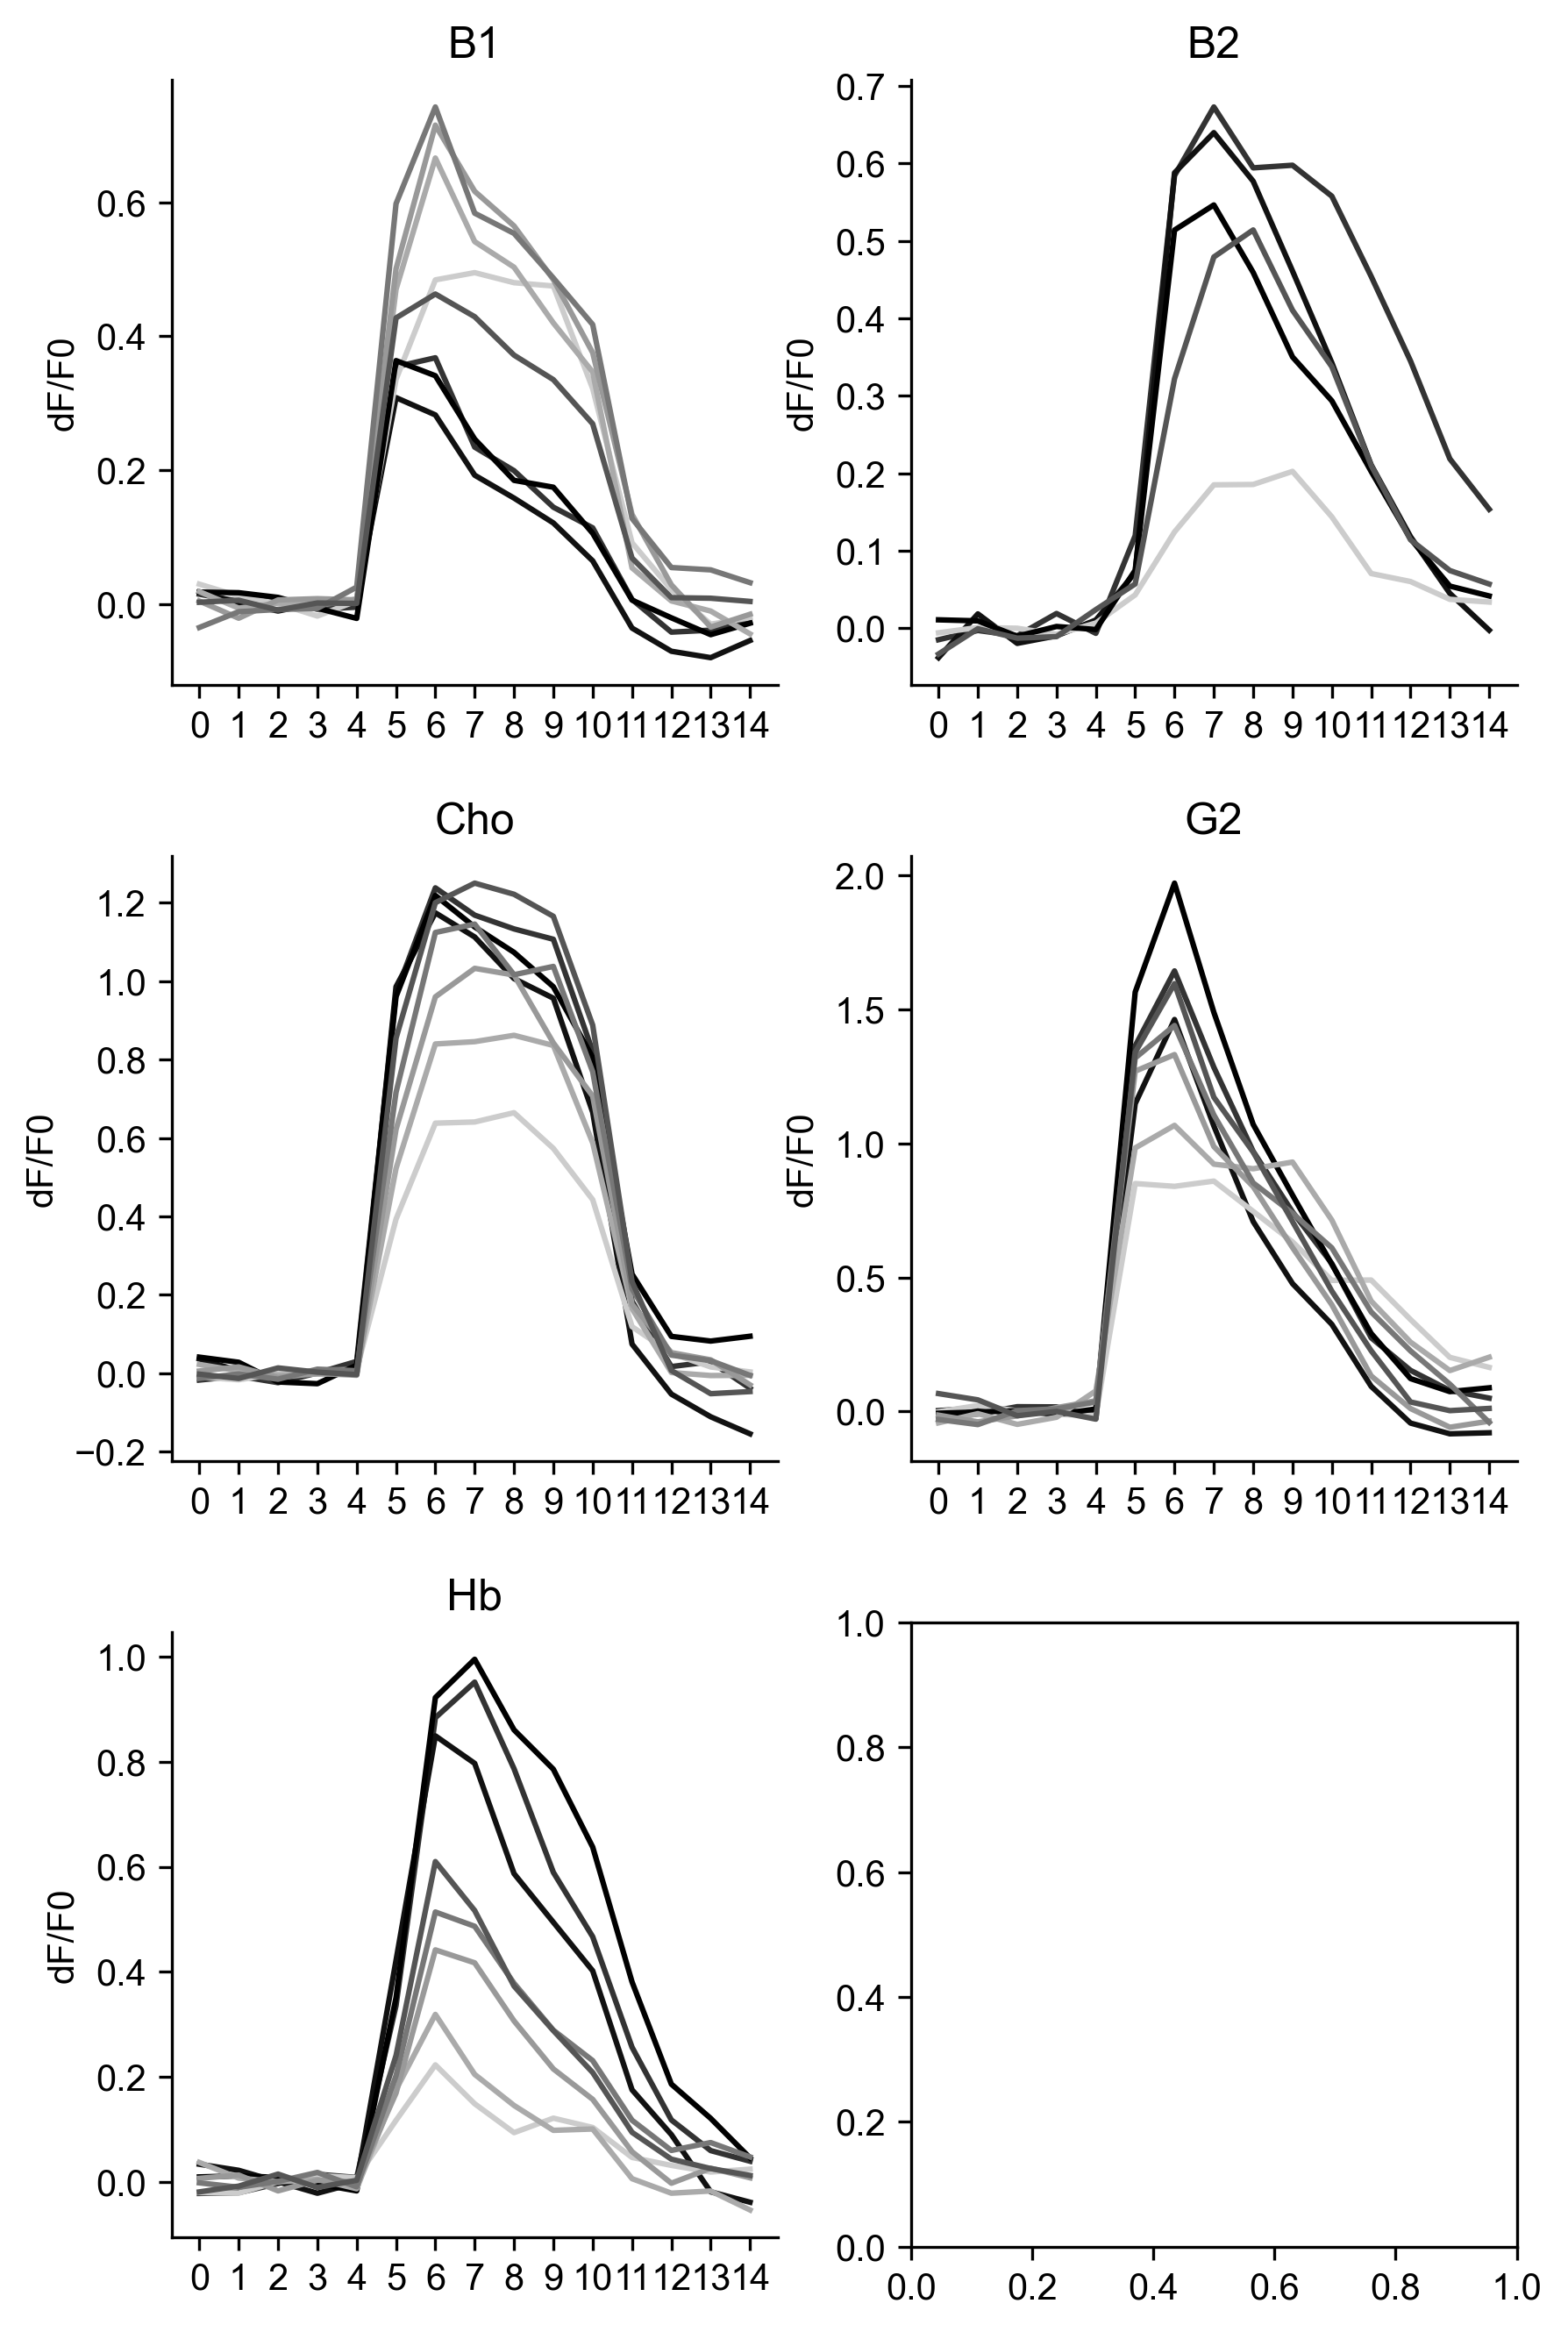

In [21]:
neurons = df['neuron'].unique()
stimuli = df['stimuli'].unique()
# create color dictionary
colors = {
    '1V':'#cccccc',
    '2V':'#aaaaaa',
    '3V':'#999999',
    '4V':'#777777',
    '5V':'#555555',
    '10V':'#333333',
    '15V':'#111111',
    '20V':'#000000'}

plt.rcParams['font.sans-serif'] = "Arial"
    # Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"

fig,axs = plt.subplots(3,2, figsize=(6,9), dpi=300)
axs = axs.flatten()
for n, neuron in enumerate(neurons):
    subset = df[df['neuron']==neuron]
    for s, stimulus in enumerate(stimuli):
        to_plot = subset[subset['stimuli']==stimulus]
        to_plot.drop(['stimuli', 'neuron'], axis=1)
        axs[n].plot(to_plot.mean(),color = colors[stimulus])
        axs[n].set_title(neuron)
        x_left, x_right = axs[n].get_xlim()
        y_low, y_high = axs[n].get_ylim()       
        axs[n].set_aspect(abs((x_right-x_left)/(y_low-y_high))*1)
        axs[n].spines.right.set_visible(False)
        axs[n].spines.top.set_visible(False)
        axs[n].set_ylabel('dF/F0')
plt.tight_layout()
plt.savefig('response_curves.eps',format='eps',bbox_inches='tight')
plt.savefig('response_curves.pdf',format='pdf',bbox_inches='tight')

In [17]:
import scipy.stats as stats

input = '/Volumes/TOSHIBA/IMAGING/GCaMP_data/imaging_eloise_different_stimuli/'
files = glob.glob("{}/**/**.csv".format(input), recursive = True)

neurons = []
stimuli = []
mean = []

for file in files:
    response = pd.read_csv(file,sep=';')
    response = np.array(response)
    for i in range(len(response)):
        mean.append(np.mean(response[i,5:9]))
        neurons.append(file.split('/')[-2])
        stimuli.append(file.split('/')[-1].split('.')[0])

df = pd.DataFrame(np.column_stack((mean,neurons,stimuli)), columns=['mean','neuron','stimulus'])
df['stimulus'] = [int(item[:-1]) for item in df['stimulus']]
df['mean'] = pd.to_numeric(df['mean'])

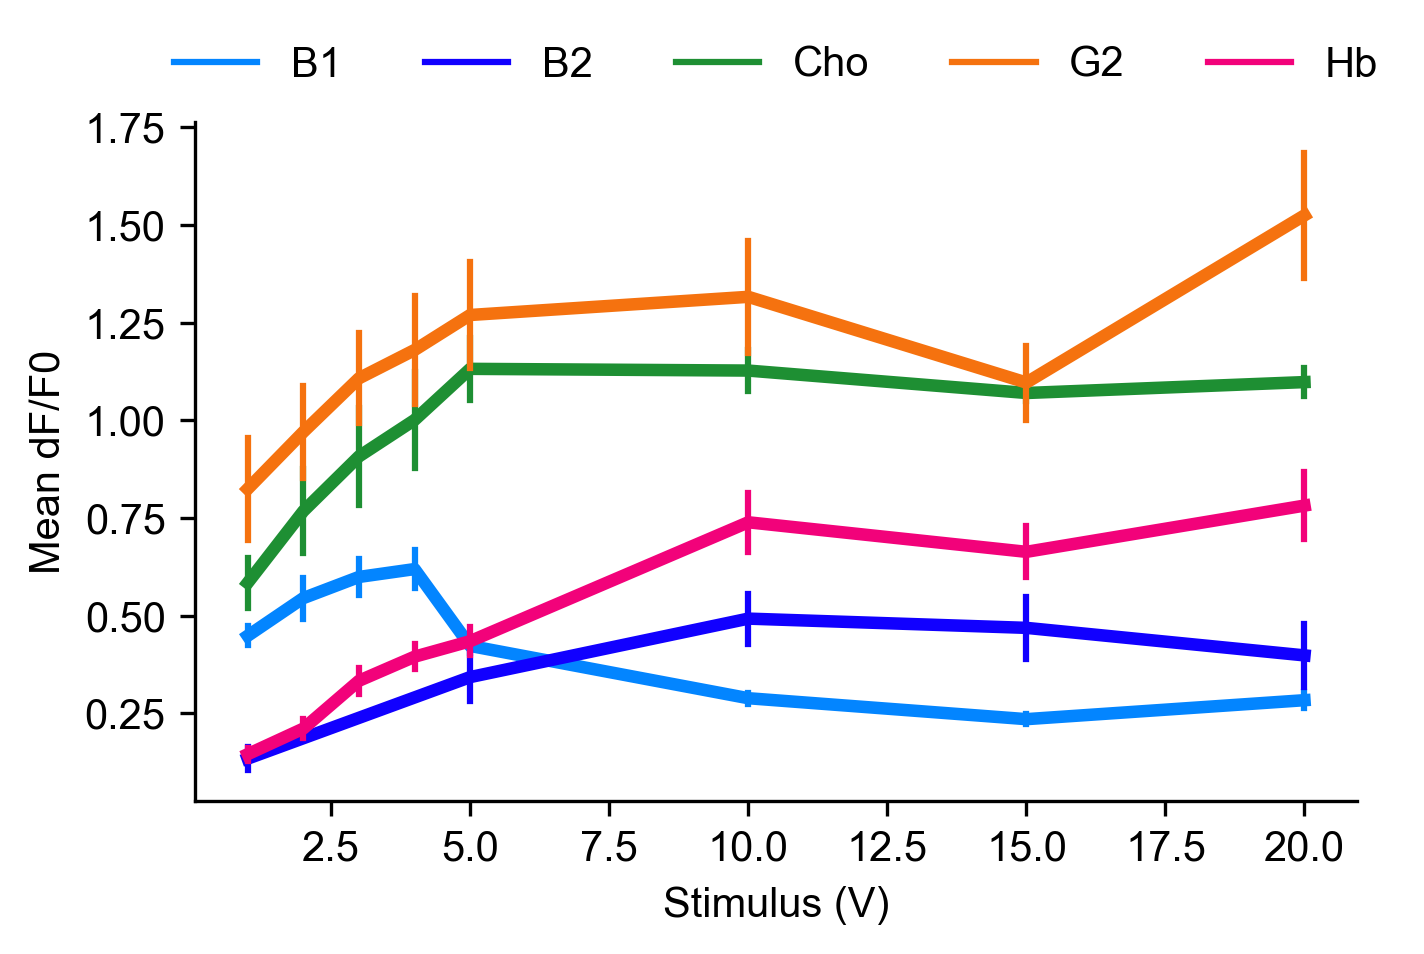

In [19]:
import seaborn as sns

# create color dictionary
colors = {
    'Cho':'#1e8f33',
    'B1':'#0385ff',
    'B2':'#1100ff',
    'Hb':'#f2027a',
    'G2':'#f5720f',
    }

plt.rcParams['font.sans-serif'] = "Arial"
    # Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"
fig,ax = plt.subplots(1,1, figsize=(5,3), dpi=300)
ax = sns.lineplot(data=df, x='stimulus', y='mean', hue='neuron',errorbar=('se',0.5),err_style='bars',linewidth = 3, palette = colors)
sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), ncol=len(neurons), title=None, frameon=False)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.set_xlabel('Stimulus (V)')
ax.set_ylabel('Mean dF/F0')
plt.savefig('response_means_all_neurons.eps',format='eps',bbox_inches='tight')
plt.savefig('response_means_all_neurons.pdf',format='pdf',bbox_inches='tight')
